## StarTracker Tracking drift check - 15-Mar-23

HyeYun Park - checking calibrated ra and dec during tracking

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time, TimeDelta
from astropy.coordinates import AltAz, ICRS, EarthLocation, Angle, FK5, SkyCoord
import astropy.units as u

In [2]:
# function to read in the metadata that has been downloaded
def read_rubintv(fname):
    df = pd.read_json(fname).T
    df = df.dropna()
    times = df[['UTC','UTC wide']]
    
    df = df.drop(columns=['UTC','UTC wide'])
    df = df.astype(float)
    
    # set time vectors
    timenew = (today+'T'+ times['UTC'].to_numpy()).astype(np.datetime64)
    timenew2= (today+'T'+ times['UTC wide'].to_numpy()).astype(np.datetime64)
    
    df['UTC'] = pd.Series(timenew, index=df.index)
    df['UTC wide'] = pd.Series(timenew2, index=df.index)
    df['seq_num'] = df.index
    
    return df

In [3]:
# read in dataframe
today = '2023-03-09'
fname = '~/data/startracker_%s.json'%today
df = read_rubintv(fname)

In [4]:
time = Time(df['MJD'], format='mjd', scale='utc')

In [5]:
data = df.iloc[:].reset_index() 

/tmp/ipykernel_3038/595213468.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data.index, data['Calculated Ra wide'], cmap='tab20_r')


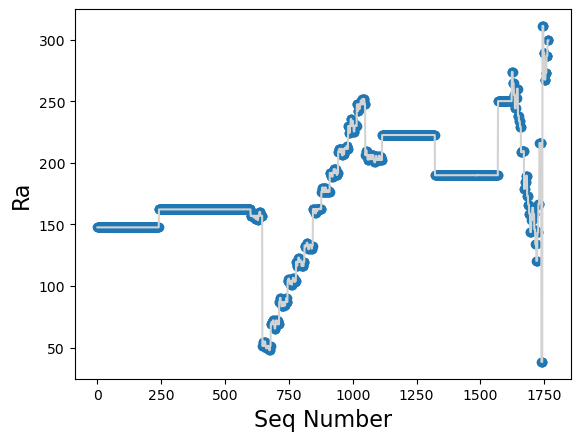

In [6]:
#plotting whole range of calculated ra wide in the file.
data['Calculated Ra wide'].plot(color='lightgray')
plt.scatter(data.index, data['Calculated Ra wide'], cmap='tab20_r')

plt.ylabel('Ra', fontsize=16)
plt.xlabel('Seq Number', fontsize=16)
plt.savefig('pointing_ra.png',dpi=100)

In [13]:
#plotting ra and dec vs time with linear fit 
def ra_dec_time_plot(data, start_seq, end_seq):
    #Selecting range of seq number of one tracking
    tracking_seq_number_start=start_seq
    tracking_seq_number_end=end_seq
    calculated_ra=data['Calculated Ra'][tracking_seq_number_start:tracking_seq_number_end]
    calculated_dec=data['Calculated Dec'][tracking_seq_number_start:tracking_seq_number_end]
    time_mjd=Time(data['MJD'][tracking_seq_number_start:tracking_seq_number_end], format='mjd', scale='utc')
    time_mjd.format='fits'
    date=time_mjd.strftime('%Y %b %d')[0]
    time=time_mjd.strftime('%H:%M:%S') #%d %b %Y')
    time_mjd.format='mjd'
    time_float=time_mjd.to_value('mjd', 'float')
    
    #making linear fit for ra vs time, dec vs time
    coef= np.polyfit(np.array(time_float), np.array(calculated_ra), 1)
    poly1d_fn = np.poly1d(coef) 
    coef_dec=np.polyfit(np.array(time_float), np.array(calculated_dec), 1)
    poly1d_fn_dec=np.poly1d(coef_dec) 
    
    #plotting
    fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(10,20))
    fig.subplots_adjust(wspace=0.)

    ax1.scatter(np.array(time),np.array(calculated_ra),  s=25)
    ax2.scatter(np.array(time),np.array(calculated_dec), s=25)

    ax1.set_ylabel('Calculated Ra',fontsize=14)
    ax1.set_xlabel('Time (utc)',fontsize=14)
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax1.plot(np.array(time), poly1d_fn(np.array(time_float)), '--k')
    #ax1.set_ylim(np.min(calculated_ra)-0.001,np.max(calculated_ra)+0.001)
    ax1.tick_params(axis='x', labelrotation=30)

    ax2.set_ylabel('Calculated Dec',fontsize=14)
    ax2.set_xlabel('Time (utc)',fontsize=14)
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax2.plot(np.array(time), poly1d_fn_dec(np.array(time_float)), '--k')
    ax2.tick_params(axis='x', labelrotation=30)
    #ax2.set_ylim(np.min(calculated_dec)-0.001,np.max(calculated_dec)+0.001)

    ax3.plot(np.array(calculated_ra), np.array(calculated_dec))
    ax3.scatter(np.array(calculated_ra), np.array(calculated_dec), color='r')
    ax3.set_ylabel('Calculated Dec',fontsize=14)
    ax3.set_xlabel('Calculated Ra',fontsize=14)

    fig.suptitle('Calculated Ra&Dec %s'%date,fontsize=16)


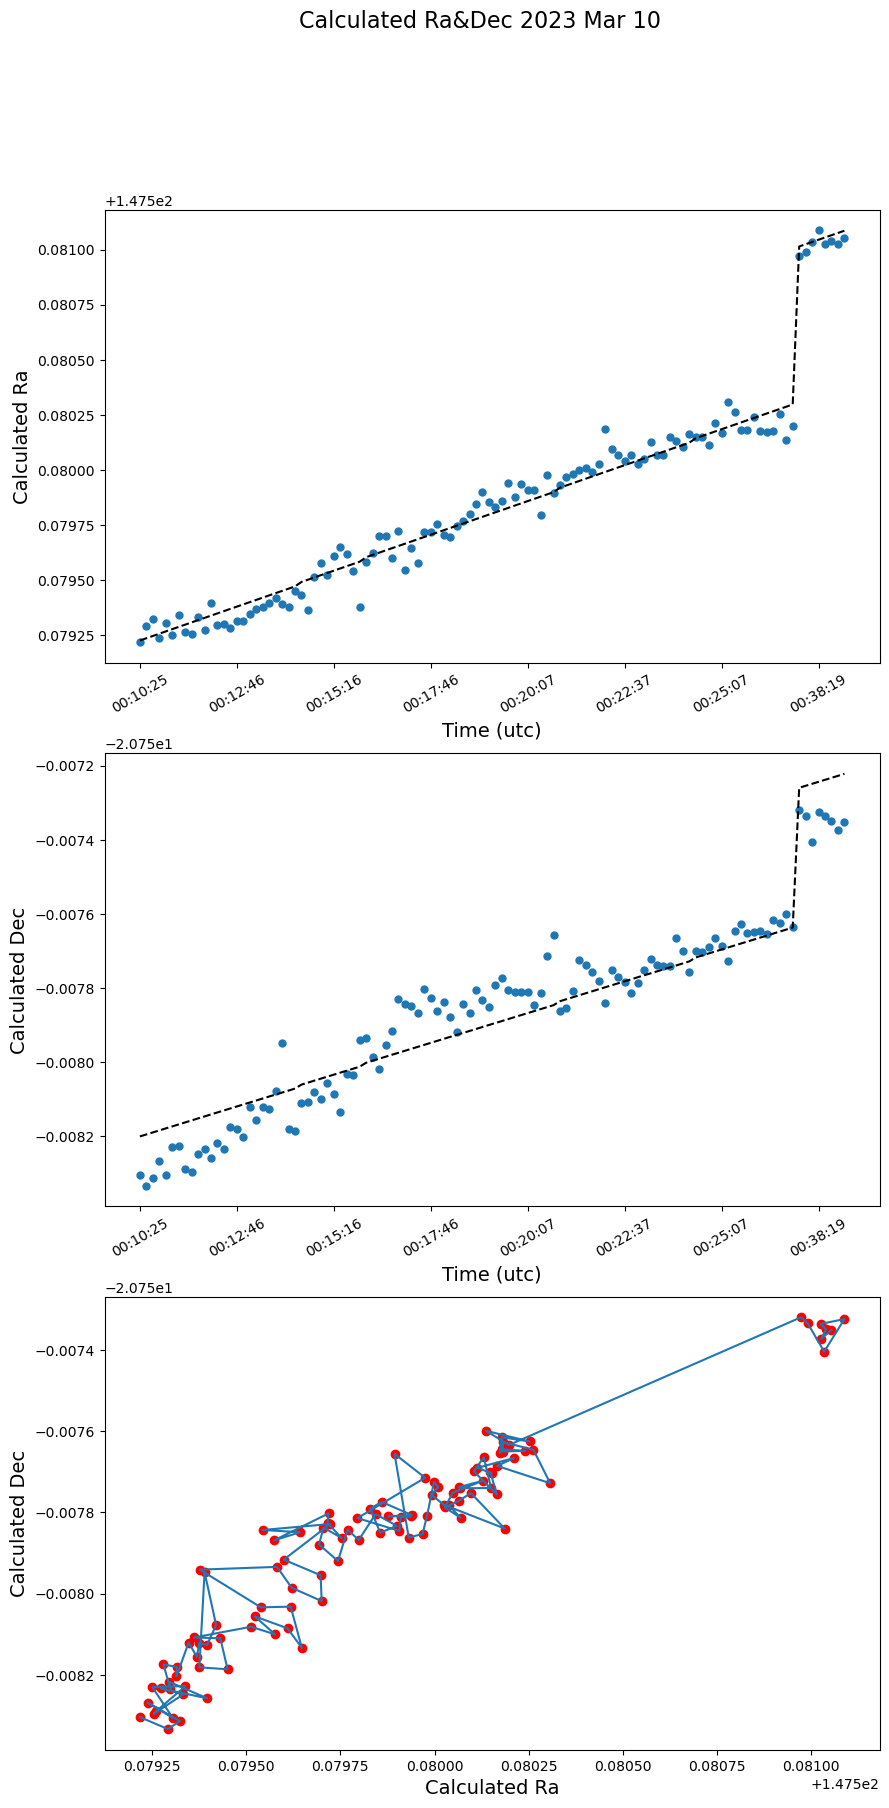

In [14]:
ra_dec_time_plot(data,2,112)

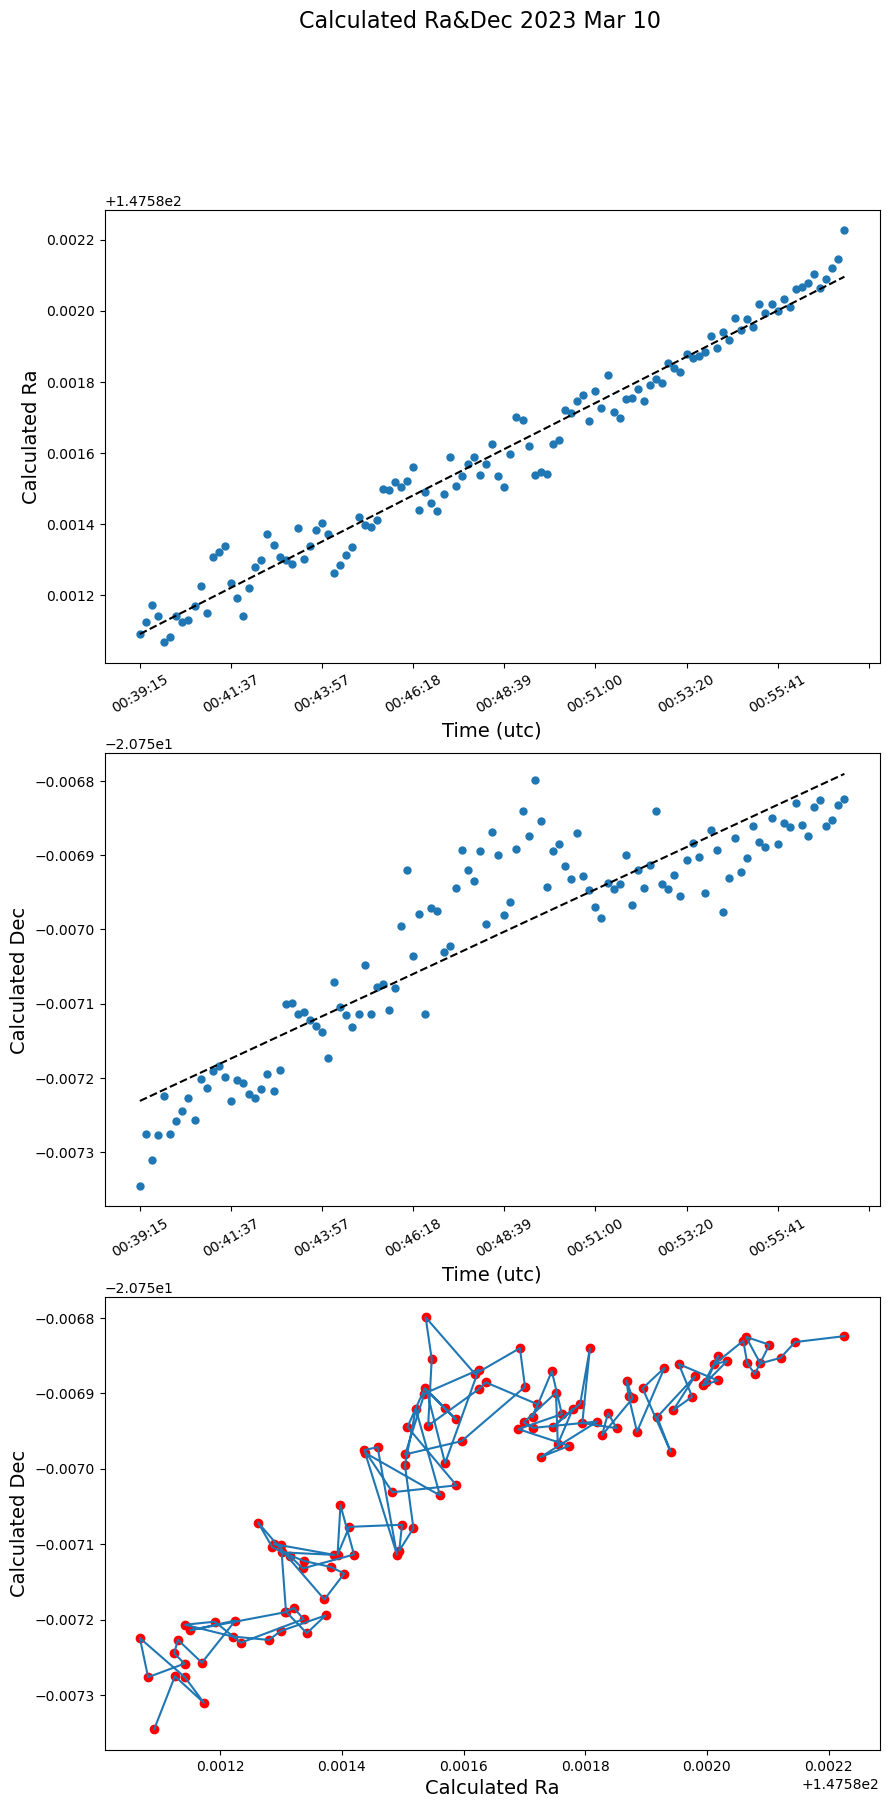

In [15]:
#for seq number 113~230
ra_dec_time_plot(data,113,230)

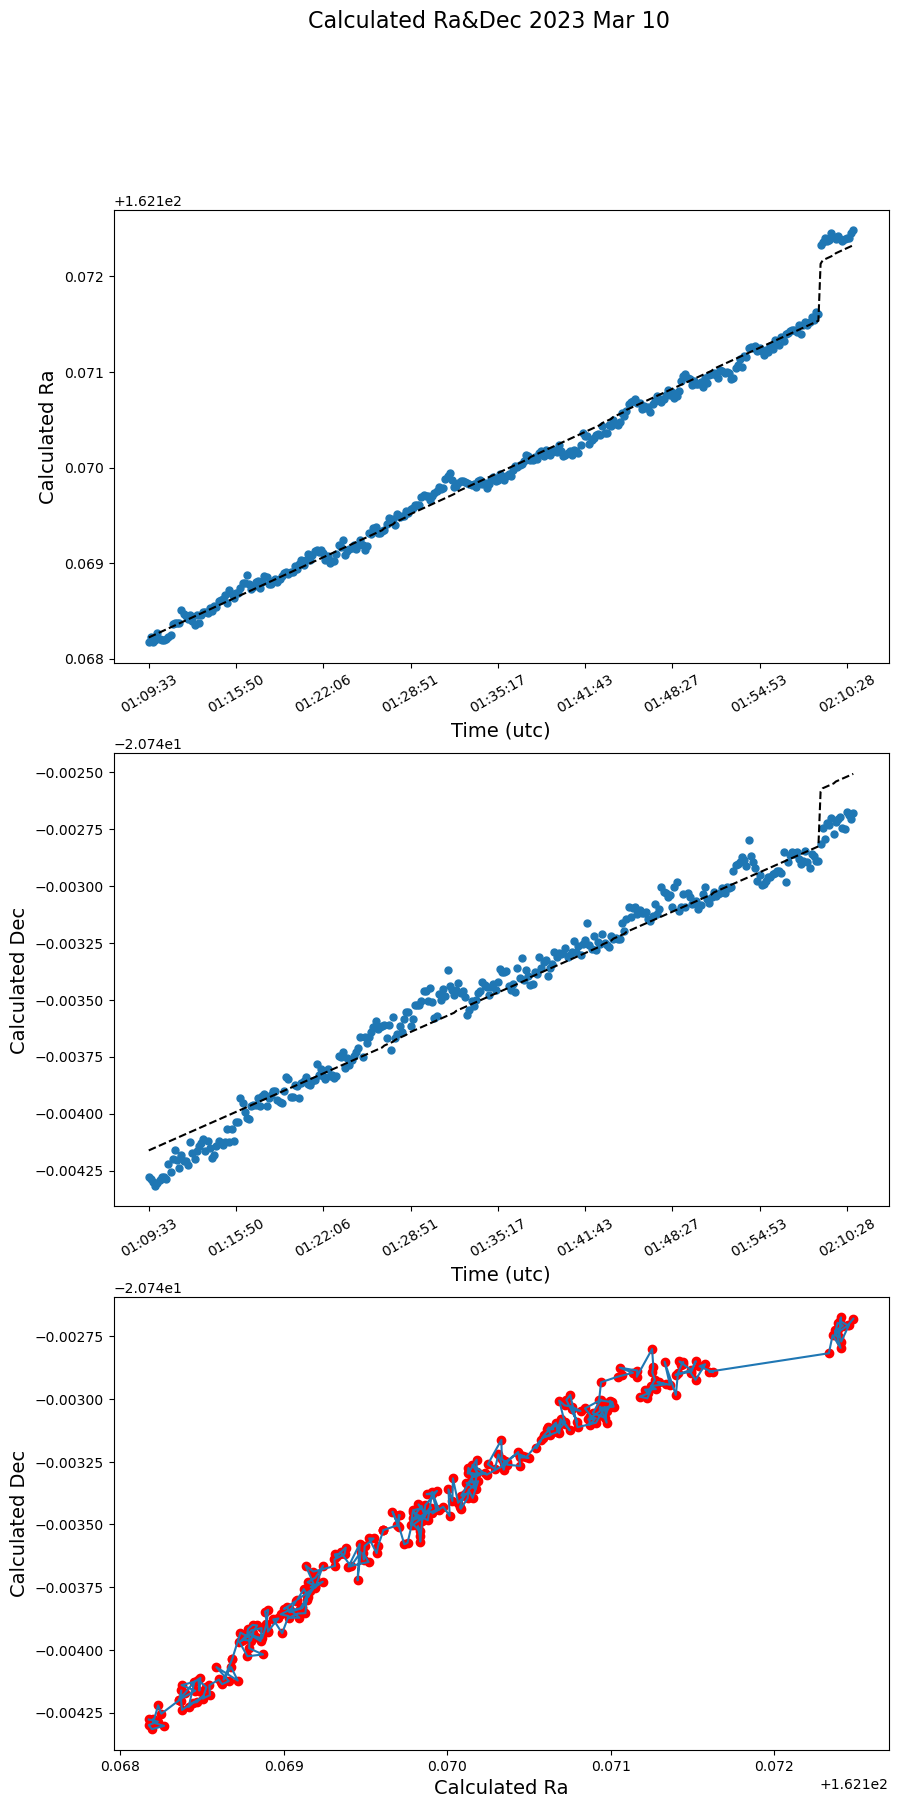

In [16]:
#for seq number 249~573
ra_dec_time_plot(data,249,573)